# Brief Examples using dataset Naruto Shippuden Episodes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 4)
plt.rcParams['figure.dpi'] = 150
plt.rc('legend', fontsize=10)

Here I will make some examples using the dataset
First we will see the quantity of fillers that Naruto Shippuden has

In [3]:
df=pd.read_csv("naruto.csv")

In [8]:
(1/500)*(df  .\
    groupby("Type").size())


Type
Filler                0.406
Manga Canon           0.468
Mixed Canon/Filler    0.126
dtype: float64

<AxesSubplot:xlabel='Type', ylabel='size'>

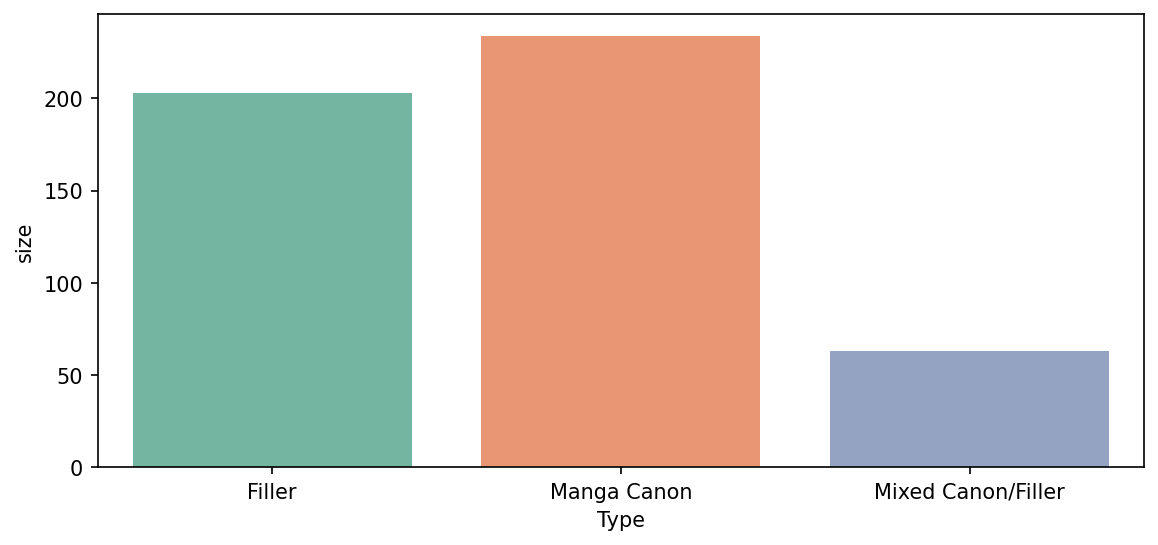

In [11]:
sns.barplot(data=df.groupby("Type",as_index=False).size(),
    x='Type',y="size",palette="Set2")

Text(0.5, 1.0, 'Rate over time')

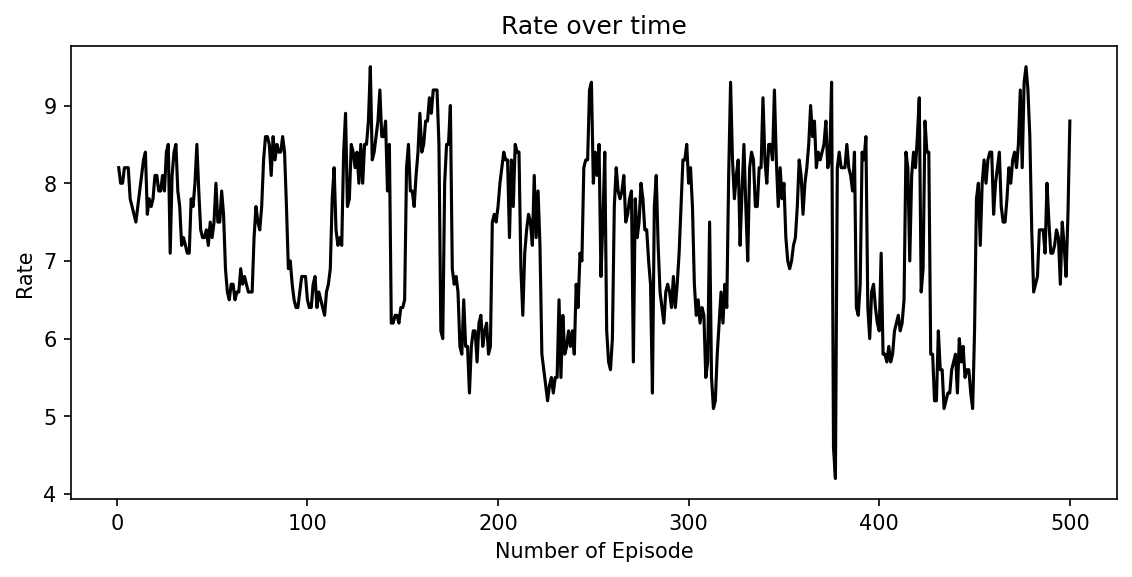

In [12]:
sns.lineplot(data=df,x="Num_episode",y="Rate",color="black")
plt.xlabel("Number of Episode")
plt.title("Rate over time")

In [17]:
df[df.Rate==df['Rate'].min()][["Num_episode","Title"]]

,Num_episode,Title
376,377,Naruto vs. Mecha Naruto


<p align="center"><img align="center" src="http://pa1.narvii.com/6434/6943988ce21f0e666c8c650956c1cae82fa16cab_00.gif" height="210px" width="350"/></p>

In [18]:
df[["Season", "Name of Season"]] = df["Saga"].str.split(' ', 1, expand=True)
seasons = df .\
    groupby("Season", as_index=False)[["Rate", "Votes"]] .\
    mean() .\
    sort_values("Rate", ascending=False)

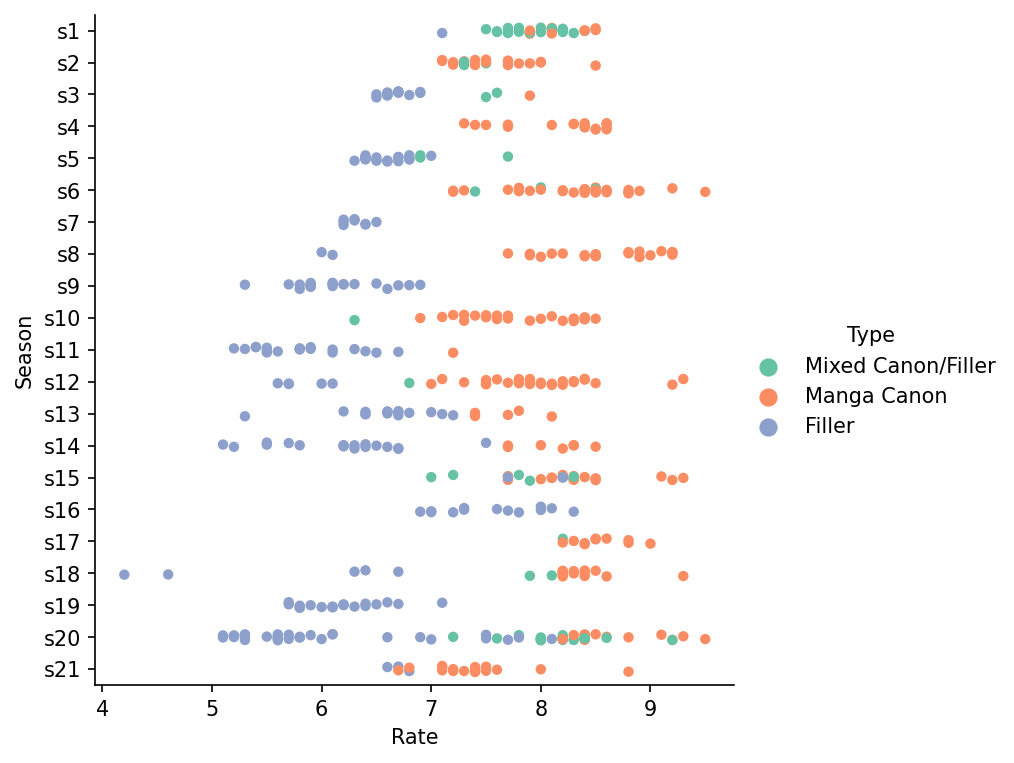

In [28]:
sns.catplot(data=df, x="Rate", y="Season", hue="Type",palette="Set2")

Text(0.5, 1.0, 'Mean rate by Season')

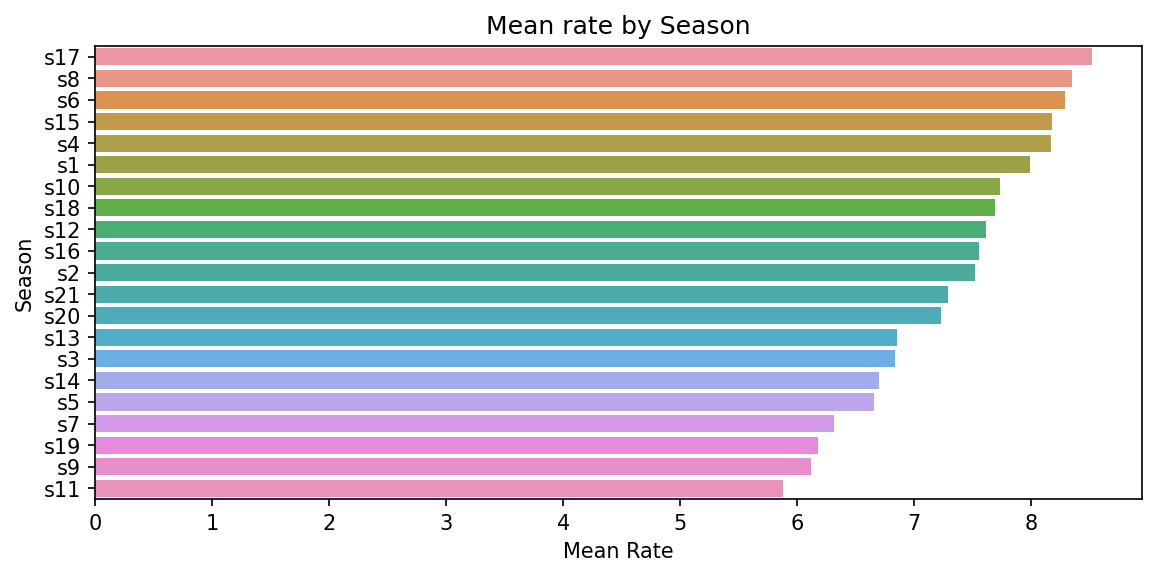

In [24]:
sns.barplot(data=seasons, x="Rate", y="Season")
plt.xlabel("Mean Rate")
plt.title("Mean rate by Season")
